#### Import Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("Datasets/Titanic.csv")

In [3]:
df_sex = pd.get_dummies(df.Sex)

In [4]:
df = df.drop(columns=["Name","Ticket","Cabin","Embarked","Sex"])

In [5]:
df = pd.concat([df_sex,df],axis=1)

In [6]:
df.isnull().sum()

female           0
male             0
PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
No_cols = df.columns.size
No_cols

9

In [9]:
df.describe()

,female,male,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.365546,0.634454,448.582633,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
std,0.481921,0.481921,259.119524,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930
min,0.000000,0.000000,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,222.250000,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000
50%,0.000000,1.000000,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700
75%,1.000000,1.000000,677.750000,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000
max,1.000000,1.000000,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [10]:
df.shape

(714, 9)

In [11]:
from sklearn.model_selection import train_test_split
X = df.drop(columns = ['Survived'])
y = df["Survived"]
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size= 0.1, random_state = 15)

##### Here We can see that how each feature is distributed over the intervel with respect to Outcome

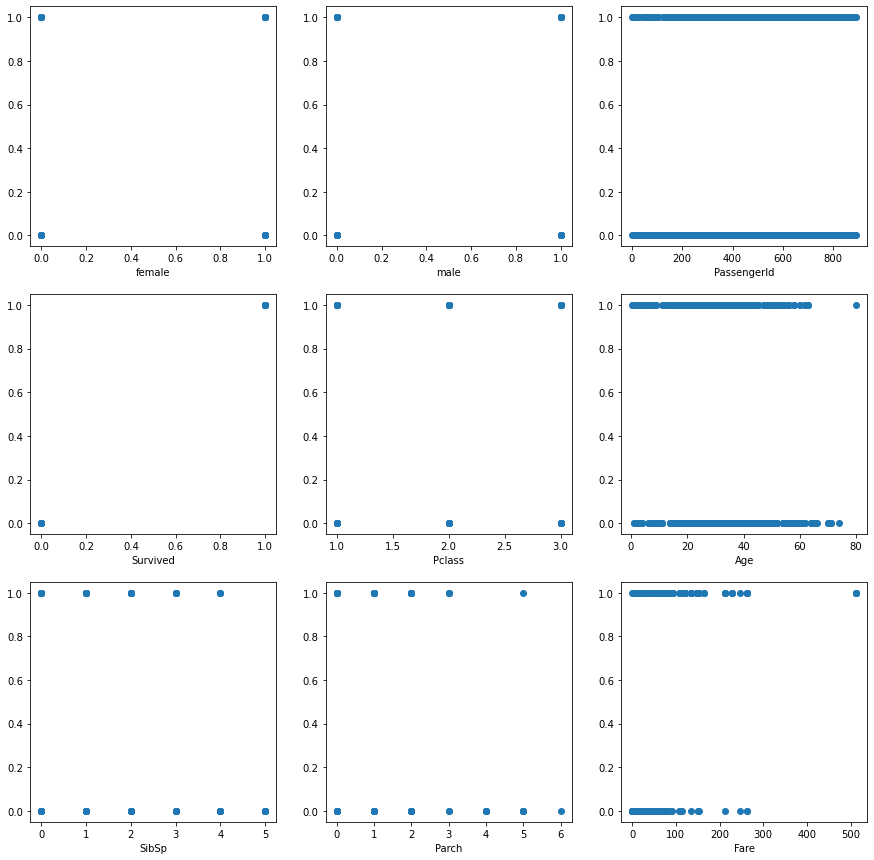

In [12]:
plt.figure(figsize=(15,15))
for j in range(No_cols):
    plt.subplot(3,3,j+1)
    x = df[df.columns[j]] 
    y = df['Survived']
    plt.scatter(x, y)
    plt.xlabel(df.columns[j])

##### We convert Inputs in to Binary values as MP-Neuron works only on Binary values

In [13]:
x_binarised_train = X_train.apply(pd.cut, bins=2, labels=[1,0])
x_binarised_test = X_test.apply(pd.cut, bins=2, labels=[1,0])

##### pd.cut() Function used to convert continuous inputs to specific range here bins specifies the # of classes

In [14]:
X_test = x_binarised_test.values
X_train = x_binarised_train.values

In [15]:
for b in range(X_train.shape[1] + 1):
    y_pred_train = []
    accurate_rows = 0

    for x, y in zip(X_train, y_train):
        y_pred = (np.sum(x) >= b)
        y_pred_train.append(y_pred)
        accurate_rows += (y == y_pred)

    print(b, accurate_rows, accurate_rows/X_train.shape[0])

0 258 0.40186915887850466
1 258 0.40186915887850466
2 258 0.40186915887850466
3 258 0.40186915887850466
4 260 0.40498442367601245
5 290 0.4517133956386293
6 364 0.5669781931464174
7 398 0.6199376947040498
8 384 0.5981308411214953


In [16]:
b = 7
y_pred_test = []
accurate_rows = 0

for x, y in zip(X_test, y_test):
    y_pred = (np.sum(x) >= b)
    y_pred_test.append(y_pred)
    accurate_rows += (y == y_pred)

print(b, accurate_rows, accurate_rows/X_test.shape[0])

7 44 0.6111111111111112


In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_test)

<AxesSubplot:>

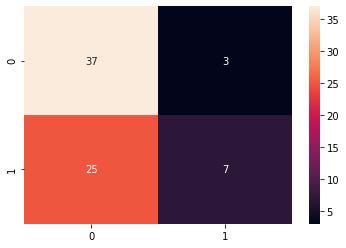

In [18]:
import seaborn as sn
sn.heatmap(cm,annot=True)

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.60      0.93      0.73        40
           1       0.70      0.22      0.33        32

    accuracy                           0.61        72
   macro avg       0.65      0.57      0.53        72
weighted avg       0.64      0.61      0.55        72



In [20]:
class MPNeuron:
    
    def __init__(self):
        self.b = None
    
    def model(self, x):
        return(sum(x) >= self.b)
    
    def predict(self, X):
        Y = []
        for x in X:
            result = self.model(x)
            Y.append(result)
        return np.array(Y)
    
    def fit(self, X, Y):
        accuracy = {}
        
        for b in range(X.shape[1] + 1):
            self.b = b
            Y_pred = self.predict(X)
            accuracy[b] = accuracy_score(Y_pred, Y)
        
        best_b = max(accuracy,key = accuracy.get)
        self.b = best_b
        
        print('Optimal Value of  is', best_b)
        print('Highest accuracy is',accuracy[best_b])


In [21]:
mp_neuron = MPNeuron()
mp_neuron.fit(X_train, y_train)

Optimal Value of  is 7
Highest accuracy is 0.6199376947040498


In [22]:
predicted = mp_neuron.predict(X_test)
accuracy_test = accuracy_score(predicted, y_test)
print(accuracy_test)

0.6111111111111112
